<a href="https://colab.research.google.com/github/ocalru/EDP-I-Simulacion-I/blob/main/Catalogo_de_funciones_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

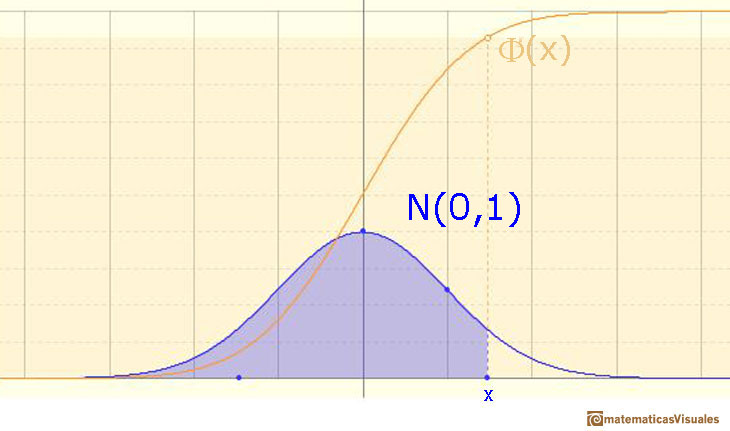
<p align="center">
    <font size="10" color="lightblue"> Distribucion normal. </font>
</p>


Una variable aleatoria $ X $ tiene una distribución normal con media $ \mu $ y desviación estándar $ \sigma $ si:

$$
X \sim \mathcal{N}(\mu, \sigma^2)
$$


$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} \exp\left( -\frac{(x - \mu)^2}{2\sigma^2} \right)
$$


Con parametros:

- **Media:** $ \mathbb{E}[X] = \mu $
- **Varianza:** $ \mathbb{V}[X] = \sigma^2 $
- **Desviación estándar:** $ \sigma $

Pseudocodigo (Metodo de Box Muller ):

-  Generar dos números $ U1 $ y $ U2 $ uniformemente distribuidos en $ (0, 1) $
- Calcular: $ Z = sqrt(-2 * ln(U1)) * cos(2 * pi * U2) $
- Retornar:$ X = mu + sigma * Z$

In [ ]:
import numpy as np

def simular_normal(mu, sigma, n=1):
    u1 = np.random.rand(n) # se generan las funciones uniformes en (0,1) requeridas para el metodo de box muller
    u2 = np.random.rand(n)
    z = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2) # Se aplica la estandarizacion para una distribucion normal con media 0 y desviacion estandar 1
    return mu + sigma * z # retorna los valores de la variable X (la variable que sigue una distribucion normal)

# Ejemplo: generar 5 valores normales
simular_normal(0, 1, n=5)


array([-0.68377746,  0.20960457,  1.11983228, ..., -0.01853279,
        0.0966545 ,  0.78241893])

<p align="center">
    <font size="10" color="lightblue"> Distribucion continua. </font>
</p>


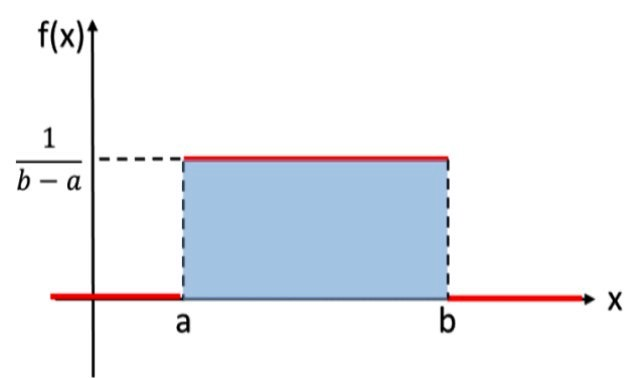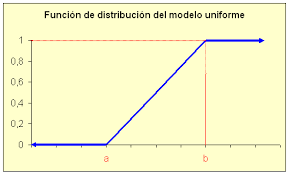
**Parámetros:**  
$ a \in \mathbb{R},\ b \in \mathbb{R},\ a < b $


$$
f(x) =
\begin{cases}
\frac{1}{b - a}, & \text{si } a \leq x \leq b \\
0, & \text{en otro caso}
\end{cases}
$$



$$
F(x) =
\begin{cases}
0, & x < a \\
\frac{x - a}{b - a}, & a \leq x < b \\
1, & x \geq b
\end{cases}
$$



$$
\mu = \frac{a + b}{2}
$$



$$
\sigma^2 = \frac{(b - a)^2}{12}
$$



$$
\sigma = \sqrt{\frac{(b - a)^2}{12}}
$$

Pseudocodigo:

Entrada: a, b:
- Generar $ u ∼ U(0,1) $
- $ x ← a + (b − a) * u $
- Retornar  $ x $

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- parámetros de la distribución ---
a, b = 0.0, 1.0       # intervalo [a, b]
n_muestras = 10_000   # cuántas muestras quieres

# --- generación de las muestras ---
rng = np.random.default_rng()           # generador moderno (PCG64)
muestras = rng.uniform(a, b, n_muestras)

# --- mostrar el arreglo de valores ---
print("Valores generados:")
print(muestras)

Valores generados:
[0.51380413 0.63901008 0.73685042 ... 0.67302518 0.30099404 0.70307756]


<p align="center">
    <font size="10" color="lightblue"> Distribución Triangular  </font>
</p>

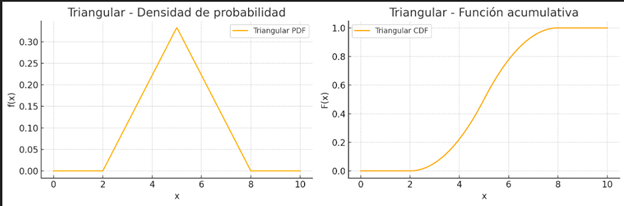

**Parámetros:**  
$$ a < c < b $$

Densidad de probabilidad:

$$
f(x) =
\begin{cases}
\frac{2(x - a)}{(b - a)(c - a)}, & a \leq x < c \\
\frac{2(b - x)}{(b - a)(b - c)}, & c \leq x \leq b \\
0, & \text{en otro caso}
\end{cases}
$$

Función de distribución acumulada (por partes):

$$
F(x) =
\begin{cases}
0, & x < a \\
\frac{(x - a)^2}{(b - a)(c - a)}, & a \leq x < c \\
1 - \frac{(b - x)^2}{(b - a)(b - c)}, & c \leq x \leq b \\
1, & x > b
\end{cases}
$$


$$
\mu = \frac{a + b + c}{3}
$$


$$
\sigma^2 = \frac{a^2 + b^2 + c^2 - ab - ac - bc}{18}
$$

Entrada: a, c, b
- Generar $u ∼ U(0,1)$
- if $u < (c - a)/(b - a)$ then
- $ x ← a + sqrt(u * (b - a) * (c - a))$
- else $ x ← b - sqrt((1 - u) * (b - a) * (b - c)) $
- Retornar $ x $

In [ ]:
# Importamos la librería numpy para operaciones numéricas y generación de números aleatorios
import numpy as np

# Definimos una función para generar números aleatorios con distribución triangular
def triangular_random(a, c, b, size=1):
    # Generamos 'size' valores aleatorios u con distribución uniforme en el intervalo [0, 1]
    u = np.random.uniform(0, 1, size)

    # Aplicamos la fórmula de la distribución triangular usando np.where para cada valor de u:
    # Si u < (c - a)/(b - a), usamos la fórmula de la parte izquierda (a <= x < c)
    # Si no, usamos la fórmula de la parte derecha (c <= x <= b)
    x = np.where(
        u < (c - a) / (b - a),                          # Condición: u está en la parte izquierda del triángulo
        a + np.sqrt(u * (b - a) * (c - a)),             # Fórmula para la parte izquierda
        b - np.sqrt((1 - u) * (b - a) * (b - c))        # Fórmula para la parte derecha
    )

    # Devolvemos el arreglo de valores generados con distribución triangular
    return x

# ----------------------------- #
# EJEMPLO DE USO:

# Definimos los parámetros de la distribución triangular: a < c < b
a = 1   # límite inferior
c = 3   # moda (valor más probable)
b = 5   # límite superior

# Generamos 10 valores aleatorios con la distribución triangular especificada
muestras = triangular_random(a, c, b, size=10)

# Imprimimos los valores generados
print(muestras)


<p align="center">
    <font size="10" color="lightblue"> Distribución Exponencial </font>
</p>

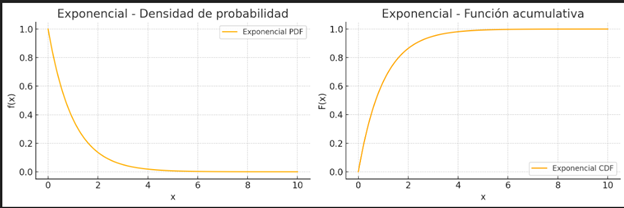

Densidad:

$$
f(x) = \lambda e^{-\lambda x}, \quad x \geq 0
$$

Función acumulativa:

$$
F(x) = 1 - e^{-\lambda x}
$$

Media:

$$
\mu = \frac{1}{\lambda}
$$

Varianza:

$$
\sigma^2 = \frac{1}{\lambda^2}
$$

Pseudocodigo:

Entrada: lambda

- Generar $ u ∼ U(0,1) $
- $ x ← -ln(1 - u)/lambda $
- Retornar $ x $

In [ ]:
import numpy as np

# Parámetro lambda de la distribución exponencial (tasa)
lam = 1.5  # por ejemplo

# Número de muestras a generar
n = 1000

# Generar números aleatorios con distribución exponencial
exponenciales = np.random.exponential(scale=1/lam, size=n)

# Mostrar las primeras 10 muestras
print(exponenciales[:10])

<p align="center">
    <font size="10" color="lightblue"> Distribución Erlang  </font>
</p>

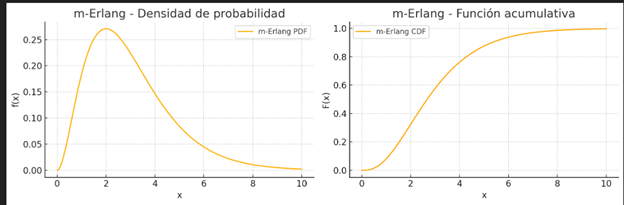

**Densidad:**

$$
f(x) = \frac{\lambda^k x^{k-1} e^{-\lambda x}}{(k-1)!}, \quad x \geq 0
$$

Función acumulativa:

$$
F(x) = 1 - e^{-\lambda x}
$$

Media:

$$
\mu = \frac{k}{\lambda}
$$

Varianza:

$$
\sigma^2 = \frac{k}{\lambda^2}
$$

Pseudocodigo:

Entrada:$ k, lambda $
$ x ← 0 $
 Para $ i = 1$  hasta $ k $
- Generar $ u ∼ U(0,1) $
- $ x ← x - ln(1 - u)/lambda $
- Retornar $ x $

In [ ]:
import numpy as np

# Parámetros de la distribución Erlang
k = 3         # forma (entero positivo)
lam = 2.0     # tasa

# Número de muestras a generar
n = 1000

# La escala para np.random.gamma es 1/lambda
erlang = np.random.gamma(shape=k, scale=1/lam, size=n)

# Mostrar las primeras 10 muestras
print(erlang[:10])


<p align="center">
    <font size="10" color="lightblue"> Distribución Gamma  </font>
</p>

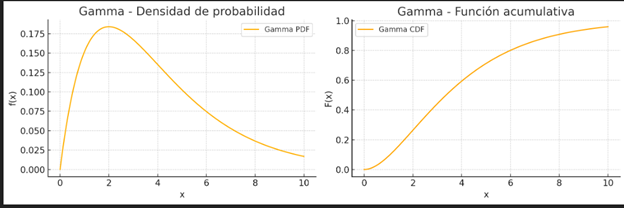

Densidad:

$$
f(x) = \frac{1}{\Gamma(\alpha)\theta^\alpha} x^{\alpha - 1} e^{-x / \theta}, \quad x \geq 0
$$

Función acumulativa:

$$
F(x) = P(\alpha, x/\theta)
$$

Media:

$$
\mu = \alpha \theta
$$

**Varianza:**

$$
\sigma^2 = \alpha \theta^2
$$

Pseudocodigo:

Entrada:
  - alpha: parámetro de forma (positivo, puede ser decimal)
  - beta: parámetro de tasa (positivo)
  - n: cantidad de números a generar

Proceso:
  - Inicializar una lista vacía llamada "resultados"
  - Calcular scale = 1 / beta
  - Para i desde 1 hasta n hacer:
      - Generar un número aleatorio con distribución Gamma con parámetros (alpha, scale)
      - Agregar ese número a la lista "resultados"

Salida:
  - Mostrar los primeros 10 números de la lista "resultados"


In [ ]:
import numpy as np

# Parámetros de la distribución Gamma
alpha = 2.5   # forma (puede ser no entero)
beta = 1.5    # tasa

# Número de muestras a generar
n = 1000

# La escala para np.random.gamma es 1/beta (es decir, el inverso de la tasa)
gamma = np.random.gamma(shape=alpha, scale=1/beta, size=n)

# Mostrar las primeras 10 muestras
print(gamma[:10])

<p align="center">
    <font size="10" color="lightblue"> Distribución Weibull  </font>
</p>

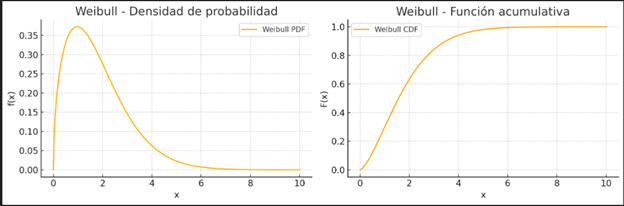

Densidad:

$$
f(x) = \frac{c}{\lambda} \left( \frac{x}{\lambda} \right)^{c - 1} e^{-(x / \lambda)^c}, \quad x \geq 0
$$

**Función acumulativa:**

$$
F(x) = 1 - e^{-(x / \lambda)^c}
$$

Media:

$$
\mu = \lambda \, \Gamma\left(1 + \frac{1}{c}\right)
$$

Varianza:

$$
\sigma^2 = \lambda^2 \left[ \Gamma\left(1 + \frac{2}{c}\right) - \left( \Gamma\left(1 + \frac{1}{c} \right) \right)^2 \right]
$$








In [ ]:
import numpy as np

# Parámetros de la distribución Weibull
c = 1.5    # parámetro de forma
lmbda = 2  # parámetro de escala
n = 10     # cantidad de datos a generar

# Generar números aleatorios Weibull
weibull_data = np.random.weibull(c, n) * lmbda

# Mostrar los valores generados
print("Números generados con distribución Weibull:")
print(weibull_data)



<p align="center">
    <font size="10" color="lightblue"> Distribución Log-Normal </font>
</p>


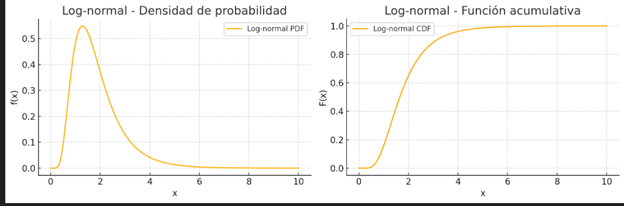

Densidad:

$$
f(x) = \frac{1}{x \sigma \sqrt{2\pi}} \exp\left( -\frac{(\ln x - \mu)^2}{2\sigma^2} \right), \quad x > 0
$$

Media:

$$
\mathbb{E}[X] = \exp\left( \mu + \frac{\sigma^2}{2} \right)
$$

Varianza:

$$
\text{Var}(X) = \left( \exp(\sigma^2) - 1 \right) \exp\left( 2\mu + \sigma^2 \right)
$$


In [ ]:
import numpy as np

# Parámetros de la distribución log-normal
mu = 0       # Media del logaritmo
sigma = 0.5  # Desviación estándar del logaritmo

# Tamaño de la muestra
n = 100

# Generar muestra que sigue una distribución log-normal
muestra = np.random.lognormal(mean=mu, sigma=sigma, size=n)

# Mostrar los primeros 10 números
print("Muestra de 10 valores de una distribución log-normal:")
print(muestra[:10])


<p align="center">
    <font size="10" color="lightblue">Distribución Beta </font>
</p>



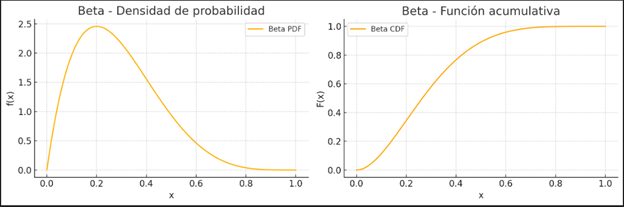

Densidad de probabilidad:

$$
f(x) = \frac{x^{\alpha - 1} (1 - x)^{\beta - 1}}{B(\alpha, \beta)}, \quad 0 < x < 1
$$

Donde $ B(\alpha, \beta)$ es la función Beta.

Media:

$$
\mu = \frac{\alpha}{\alpha + \beta}
$$

Varianza:

$$
\mathrm{Var}(X) = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}
$$


In [ ]:
import numpy as np

# Parámetros alpha y beta
alpha = 2.0
beta = 5.0

# Número de muestras
n_samples = 10

# Generar números aleatorios con distribución Beta
samples = np.random.beta(alpha, beta, n_samples)

# Mostrar los números generados
print(samples)


<p align="center">
    <font size="10" color="lightblue">  Distribución de Poisson
 </font>
</p>

La función de masa de probabilidad (PMF) es:

$$
P(X = k) = \frac{\lambda^k e^{-\lambda}}{k!}, \quad \text{para } k = 0, 1, 2, \dots
$$

Parametros:

- **Media (Esperanza Matemática):**
$$
\mu = \lambda
$$

- **Varianza:**
$$
\sigma^2 = \lambda
$$

- **Desviación Estándar:**
$$
\sigma = \sqrt{\lambda}
$$

Pseudocodigo:

1. Definir el parámetro lambda (tasa promedio de eventos)
2. Elegir un número n de muestras a generar
3. Para i desde 1 hasta n hacer:
     - Generar un número aleatorio que siga la distribución de Poisson con media lambda
     - Guardar el número como una muestra
4. Retornar todas las muestras generadas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetro de la distribución de Poisson
lmbda = 4.0  # tasa de eventos
n = 5    # número de muestras

# Generar muestras
samples = np.random.poisson(lmbda, n)

print(samples)

<p align="center">
    <font size="10" color="lightblue">  Distribución Geométrica
    
 </font>
</p>

La función de masa de probabilidad (PMF) es:

$$
P(X = k) = (1 - p)^{k - 1} p \quad \text{para } k = 1, 2, 3, \dots
$$

Medidas Teóricas:

- **Media (Esperanza Matemática):**
$$
\mu = \frac{1}{p}
$$

- **Varianza:**
$$
\sigma^2 = \frac{1 - p}{p^2}
$$

- **Desviación Estándar:**
$$
\sigma = \sqrt{\frac{1 - p}{p^2}}
$$

Pseudocodigo:

1. Definir el parámetro p de la distribución
2. Elegir un número n de muestras a generar
3. Para i desde 1 hasta n hacer:
     - Generar un número aleatorio u en [0, 1]
     - Calcular x = ceil( log(1 - u) / log(1 - p) )
     - Guardar x como una muestra de la distribución geométrica
4. Retornar todas las muestras generadas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetro de la distribución geométrica
p = 0.3     # probabilidad de éxito
n = 5   # número de muestras

# Generar muestras (numpy cuenta desde 1, como en la fórmula teórica)
samples = np.random.geometric(p, n)

print(samples)


 <p align="center">
    <font size="10" color="lightblue">  Distribución Binomial Negativa
    
 </font>
</p>

La función de masa de probabilidad (PMF) es:

$$
P(X = k) = \binom{k - 1}{r - 1} p^r (1 - p)^{k - r}, \quad \text{para } k = r, r+1, r+2, \dots
$$

donde $k$ es el número total de ensayos hasta obtener el $r$-ésimo éxito.

 Medidas Teóricas:

- **Media (Esperanza Matemática):**
$$
\mu = \frac{r}{p}
$$

- **Varianza:**
$$
\sigma^2 = \frac{r(1 - p)}{p^2}
$$

- **Desviación Estándar:**
$$
\sigma = \sqrt{\frac{r(1 - p)}{p^2}}
$$

Pseudocodigo:

1. Definir parámetros r (número de éxitos) y p (probabilidad de éxito)
2. Elegir un número n de muestras a generar
3. Para i desde 1 hasta n hacer:
     - Simular una variable aleatoria que cuente los ensayos hasta obtener r éxitos
     - Guardar el número total de ensayos (incluyendo éxitos) como una muestra
4. Retornar todas las muestras generadas


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la distribución binomial negativa
r = 5       # número de éxitos deseados
p = 0.3     # probabilidad de éxito
n = 5   # número de muestras

# Generar muestras (la función devuelve el número total de ensayos hasta r éxitos)
samples = np.random.negative_binomial(r, p, n)

# Ajustar muestras a k ensayos (ya incluye r éxitos)
samples_k = samples + r  # convertir número de fracasos a número total de ensayos

print(samples_k)

<p align="center">
    <font size="10" color="lightblue"> Distribución Bernoulli
    
 </font>
</p>


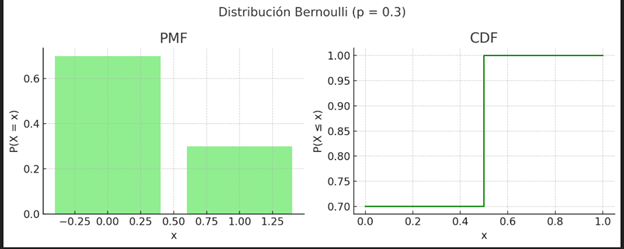


La función de masa de probabilidad (PMF) es:

$$
P(X = x) =
\begin{cases}
p & \text{si } x = 1 \\
1 - p & \text{si } x = 0
\end{cases}
$$

Medidas Teóricas:

- **Media (Esperanza Matemática):**
$$
\mu = p
$$

- **Varianza:**
$$
\sigma^2 = p(1 - p)
$$

- **Desviación Estándar:**
$$
\sigma = \sqrt{p(1 - p)}
$$

Pseudocodigo:

1. Definir el parámetro p de la distribución
2. Elegir un número n de muestras a generar
3. Para i desde 1 hasta n hacer:
     - Generar un número aleatorio u en [0, 1]
     - Si u < p, asignar x = 1 (éxito), si no, x = 0 (fracaso)
     - Guardar x como una muestra de la distribución de Bernoulli
4. Retornar todas las muestras generadas

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetro de la distribución de Bernoulli
p = 0.3     # probabilidad de éxito
n = 5   # número de muestras

# Generar muestras
samples = np.random.binomial(1, p, n)

print(samples)